### Give Description of the notebook


In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Data Cleaning and Feature Engineering 

In [218]:
# Load the dataset
df = pd.read_csv('../data/data.csv')

In [219]:
# View the head of the dataset
df.head(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,15/08/24,Ath Bilbao,Getafe,1,1,D,1,0,H,NaN,...,4,2,15,12,5,6,4,1,0,0
1,15/08/24,Betis,Girona,1,1,D,1,0,H,NaN,...,4,2,11,7,4,4,2,0,0,0
2,16/08/24,Celta,Alaves,2,1,H,0,1,A,NaN,...,4,2,8,23,3,3,3,2,0,0
3,16/08/24,Las Palmas,Sevilla,2,2,D,1,1,D,NaN,...,5,5,12,13,6,3,0,0,0,0
4,17/08/24,Osasuna,Leganes,1,1,D,0,1,A,NaN,...,5,4,14,12,6,4,3,2,0,0
5,17/08/24,Valencia,Barcelona,1,2,A,1,1,D,NaN,...,1,8,11,13,3,8,2,3,0,0
6,18/08/24,Sociedad,Vallecano,1,2,A,0,0,D,NaN,...,5,5,14,21,10,5,2,4,0,0
7,18/08/24,Mallorca,Real Madrid,1,1,D,0,1,A,NaN,...,5,4,11,6,8,7,1,0,0,1
8,19/08/24,Valladolid,Espanol,1,0,H,1,0,H,NaN,...,3,2,15,8,3,2,2,2,0,0
9,19/08/24,Villarreal,Ath Madrid,2,2,D,2,2,D,NaN,...,3,5,6,10,2,3,1,3,0,0


In [220]:
# Display the column names and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      380 non-null    object 
 1   HomeTeam  380 non-null    object 
 2   AwayTeam  380 non-null    object 
 3   FTHG      380 non-null    int64  
 4   FTAG      380 non-null    int64  
 5   FTR       380 non-null    object 
 6   HTHG      380 non-null    int64  
 7   HTAG      380 non-null    int64  
 8   HTR       380 non-null    object 
 9   Referee   0 non-null      float64
 10  HS        380 non-null    int64  
 11  AS        380 non-null    int64  
 12  HST       380 non-null    int64  
 13  AST       380 non-null    int64  
 14  HF        380 non-null    int64  
 15  AF        380 non-null    int64  
 16  HC        380 non-null    int64  
 17  AC        380 non-null    int64  
 18  HY        380 non-null    int64  
 19  AY        380 non-null    int64  
 20  HR        380 non-null    int64 

In [221]:
# Lets first make a copy of the dataset to work with
df_copy = df.copy()

In [222]:
# Now that we see the refree column is not present in the dataset, we can drop it
df_copy.drop(columns=['Referee'], inplace=True)

In [223]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      380 non-null    object
 1   HomeTeam  380 non-null    object
 2   AwayTeam  380 non-null    object
 3   FTHG      380 non-null    int64 
 4   FTAG      380 non-null    int64 
 5   FTR       380 non-null    object
 6   HTHG      380 non-null    int64 
 7   HTAG      380 non-null    int64 
 8   HTR       380 non-null    object
 9   HS        380 non-null    int64 
 10  AS        380 non-null    int64 
 11  HST       380 non-null    int64 
 12  AST       380 non-null    int64 
 13  HF        380 non-null    int64 
 14  AF        380 non-null    int64 
 15  HC        380 non-null    int64 
 16  AC        380 non-null    int64 
 17  HY        380 non-null    int64 
 18  AY        380 non-null    int64 
 19  HR        380 non-null    int64 
 20  AR        380 non-null    int64 
dtypes: int64(16), ob

In [224]:
# Lets check for missing values in the dataset 
df_copy.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [225]:
# The dataset does not have any missing values, so we can proceed with the analysis.
# We can breakdown the date into day, month and year to make it easier to work with
df_copy['Day'] = pd.to_datetime(df_copy['Date']).dt.day
df_copy['Month'] = pd.to_datetime(df_copy['Date']).dt.month
df_copy['Year'] = pd.to_datetime(df_copy['Date']).dt.year
df_copy['Weekday'] = pd.to_datetime(df_copy['Date']).dt.weekday

/var/folders/mj/p87t7kg14vsbdwvq7j7xr9840000gn/T/ipykernel_14243/3235812974.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['Day'] = pd.to_datetime(df_copy['Date']).dt.day
/var/folders/mj/p87t7kg14vsbdwvq7j7xr9840000gn/T/ipykernel_14243/3235812974.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['Month'] = pd.to_datetime(df_copy['Date']).dt.month
/var/folders/mj/p87t7kg14vsbdwvq7j7xr9840000gn/T/ipykernel_14243/3235812974.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['Year'] = pd.to_datetime(df_copy['Date']).dt.year
/var/folders/mj/p87t7k

In [226]:
### Now I can drop the Date column as we have extracted the necessary information from it
df_copy.drop(columns=['Date'], inplace=True)

In [227]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HomeTeam  380 non-null    object
 1   AwayTeam  380 non-null    object
 2   FTHG      380 non-null    int64 
 3   FTAG      380 non-null    int64 
 4   FTR       380 non-null    object
 5   HTHG      380 non-null    int64 
 6   HTAG      380 non-null    int64 
 7   HTR       380 non-null    object
 8   HS        380 non-null    int64 
 9   AS        380 non-null    int64 
 10  HST       380 non-null    int64 
 11  AST       380 non-null    int64 
 12  HF        380 non-null    int64 
 13  AF        380 non-null    int64 
 14  HC        380 non-null    int64 
 15  AC        380 non-null    int64 
 16  HY        380 non-null    int64 
 17  AY        380 non-null    int64 
 18  HR        380 non-null    int64 
 19  AR        380 non-null    int64 
 20  Day       380 non-null    int32 
 21  Month     380 no

In [228]:
### We have FTR and HTR as Objects, we can convert them to categorical variables
### We have three unique values in FTR and HTR, so we can convert them to categorical variables
### FTR: 'H' for Home Win, 'A' for Away Win, 'D' for Draw
df_copy['FTR'] = df_copy['FTR'].astype('object')
df_copy['HTR'] = df_copy['HTR'].astype('object')

In [229]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HomeTeam  380 non-null    object
 1   AwayTeam  380 non-null    object
 2   FTHG      380 non-null    int64 
 3   FTAG      380 non-null    int64 
 4   FTR       380 non-null    object
 5   HTHG      380 non-null    int64 
 6   HTAG      380 non-null    int64 
 7   HTR       380 non-null    object
 8   HS        380 non-null    int64 
 9   AS        380 non-null    int64 
 10  HST       380 non-null    int64 
 11  AST       380 non-null    int64 
 12  HF        380 non-null    int64 
 13  AF        380 non-null    int64 
 14  HC        380 non-null    int64 
 15  AC        380 non-null    int64 
 16  HY        380 non-null    int64 
 17  AY        380 non-null    int64 
 18  HR        380 non-null    int64 
 19  AR        380 non-null    int64 
 20  Day       380 non-null    int32 
 21  Month     380 no

In [230]:
# Map full time results (FTR) to points for home and away teams
# 'H' for Home Win, 'A' for Away Win, 'D' for Draw
# Home team gets 3 points for a win, 0 for a loss, and 1 for a draw
# Away team gets 0 points for a win, 3 for a loss, and 1 for a draw 
def get_ft_points(result):
    if result == 'H':
        return 3, 0
    elif result == 'A':
        return 0, 3
    elif result == 'D':
        return 1, 1

df_copy[['HomePoints_FT', 'AwayPoints_FT']] = df_copy['FTR'].apply(lambda x: pd.Series(get_ft_points(x)))


In [231]:
# Map half time results (HTR) to points for home and away teams
# 'H' for Home Win, 'A' for Away Win, 'D' for Draw
# Home team gets 3 points for a win, 0 for a loss, and  1 for a draw
# Away team gets 0 points for a win, 3 for a loss, and 1 for a draw 
def get_ht_points(result):
    if result == 'H':
        return 3, 0
    elif result == 'A':
        return 0, 3
    elif result == 'D':
        return 1, 1 

df_copy[['HomePoints_HT', 'AwayPoints_HT']] = df_copy['HTR'].apply(lambda x: pd.Series(get_ht_points(x)))

In [232]:
df_copy.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,HR,AR,Day,Month,Year,Weekday,HomePoints_FT,AwayPoints_FT,HomePoints_HT,AwayPoints_HT
0,Ath Bilbao,Getafe,1,1,D,1,0,H,7,9,...,0,0,15,8,2024,3,1,1,3,0
1,Betis,Girona,1,1,D,1,0,H,19,13,...,0,0,15,8,2024,3,1,1,3,0
2,Celta,Alaves,2,1,H,0,1,A,6,10,...,0,0,16,8,2024,4,3,0,0,3
3,Las Palmas,Sevilla,2,2,D,1,1,D,13,16,...,0,0,16,8,2024,4,1,1,1,1
4,Osasuna,Leganes,1,1,D,0,1,A,16,10,...,0,0,17,8,2024,5,1,1,0,3


In [233]:
# Lets also sum total Points across the season for each team
# Full-time only
home_points = df_copy.groupby('HomeTeam')['HomePoints_FT'].sum()
away_points = df_copy.groupby('AwayTeam')['AwayPoints_FT'].sum()

total_points = home_points.add(away_points, fill_value=0).sort_values(ascending=False)

df_copy['TotalPoints'] = df_copy['HomeTeam'].map(total_points) + df_copy['AwayTeam'].map(total_points)


In [234]:
df_copy.head(38)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AR,Day,Month,Year,Weekday,HomePoints_FT,AwayPoints_FT,HomePoints_HT,AwayPoints_HT,TotalPoints
0,Ath Bilbao,Getafe,1,1,D,1,0,H,7,9,...,0,15,8,2024,3,1,1,3,0,112
1,Betis,Girona,1,1,D,1,0,H,19,13,...,0,15,8,2024,3,1,1,3,0,101
2,Celta,Alaves,2,1,H,0,1,A,6,10,...,0,16,8,2024,4,3,0,0,3,97
3,Las Palmas,Sevilla,2,2,D,1,1,D,13,16,...,0,16,8,2024,4,1,1,1,1,73
4,Osasuna,Leganes,1,1,D,0,1,A,16,10,...,0,17,8,2024,5,1,1,0,3,92
5,Valencia,Barcelona,1,2,A,1,1,D,6,18,...,0,17,8,2024,5,0,3,1,1,134
6,Sociedad,Vallecano,1,2,A,0,0,D,11,12,...,0,18,8,2024,6,0,3,1,1,98
7,Mallorca,Real Madrid,1,1,D,0,1,A,12,13,...,1,18,8,2024,6,1,1,0,3,132
8,Valladolid,Espanol,1,0,H,1,0,H,12,10,...,0,19,8,2024,0,3,0,3,0,58
9,Villarreal,Ath Madrid,2,2,D,2,2,D,8,10,...,0,19,8,2024,0,1,1,1,1,146


In [235]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   HomeTeam       380 non-null    object
 1   AwayTeam       380 non-null    object
 2   FTHG           380 non-null    int64 
 3   FTAG           380 non-null    int64 
 4   FTR            380 non-null    object
 5   HTHG           380 non-null    int64 
 6   HTAG           380 non-null    int64 
 7   HTR            380 non-null    object
 8   HS             380 non-null    int64 
 9   AS             380 non-null    int64 
 10  HST            380 non-null    int64 
 11  AST            380 non-null    int64 
 12  HF             380 non-null    int64 
 13  AF             380 non-null    int64 
 14  HC             380 non-null    int64 
 15  AC             380 non-null    int64 
 16  HY             380 non-null    int64 
 17  AY             380 non-null    int64 
 18  HR             380 non-null   

In [236]:
### We can leave HomeTeam and AwayTeam as objects, as they are categorical variables
### We can also leave HTR and FTR as objects, as they are categorical variables
### And we have converted rest of the columns to appropriate data types

In [237]:
### Check for missing values again
df_copy.isnull().sum()

HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTHG             0
HTAG             0
HTR              0
HS               0
AS               0
HST              0
AST              0
HF               0
AF               0
HC               0
AC               0
HY               0
AY               0
HR               0
AR               0
Day              0
Month            0
Year             0
Weekday          0
HomePoints_FT    0
AwayPoints_FT    0
HomePoints_HT    0
AwayPoints_HT    0
TotalPoints      0
dtype: int64

In [238]:
### Lets create match result columns for better analysis

# Goal Difference (GD) for Home and Away teams
df_copy['HomeGoalDifference'] = df_copy['FTHG'] - df_copy['FTAG']
df_copy['AwayGoalDifference'] = df_copy['FTAG'] - df_copy['FTHG']

# Points
ftr_map_home = {'H': 3, 'A': 0, 'D': 1}
ftr_map_away = {'H': 0, 'A': 3, 'D': 1}

df_copy['HomePoints'] = df_copy['FTR'].map(ftr_map_home)
df_copy['AwayPoints'] = df_copy['FTR'].map(ftr_map_away)

In [239]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   HomeTeam            380 non-null    object
 1   AwayTeam            380 non-null    object
 2   FTHG                380 non-null    int64 
 3   FTAG                380 non-null    int64 
 4   FTR                 380 non-null    object
 5   HTHG                380 non-null    int64 
 6   HTAG                380 non-null    int64 
 7   HTR                 380 non-null    object
 8   HS                  380 non-null    int64 
 9   AS                  380 non-null    int64 
 10  HST                 380 non-null    int64 
 11  AST                 380 non-null    int64 
 12  HF                  380 non-null    int64 
 13  AF                  380 non-null    int64 
 14  HC                  380 non-null    int64 
 15  AC                  380 non-null    int64 
 16  HY                  380 no

In [240]:
### Lets make another dataframe for just a league table
# Home team stats
home_df = df_copy[['HomeTeam', 'FTHG', 'FTAG', 'HomePoints', 'HomeGoalDifference']].copy()
home_df.columns = ['Team', 'GoalsFor', 'GoalsAgainst', 'Points', 'GoalDifference']
home_df['GamesPlayed'] = 1

# Away team stats
away_df = df_copy[['AwayTeam', 'FTAG', 'FTHG', 'AwayPoints', 'AwayGoalDifference']].copy()
away_df.columns = ['Team', 'GoalsFor', 'GoalsAgainst', 'Points', 'GoalDifference']
away_df['GamesPlayed'] = 1


In [241]:
# Combine and aggregate the data
# Combine both home and away
all_stats = pd.concat([home_df, away_df])

# Group by team and aggregate
league_table = all_stats.groupby('Team').agg({
    'GamesPlayed': 'sum',
    'GoalsFor': 'sum',
    'GoalsAgainst': 'sum',
    'GoalDifference': 'sum',
    'Points': 'sum'
}).reset_index()

# Sort by Points, then GoalDiff
league_table = league_table.sort_values(by=['Points', 'GoalDifference'], ascending=False).reset_index(drop=True)

# Add League Position
league_table.index += 1
league_table.reset_index(inplace=True)
league_table.rename(columns={'index': 'Position'}, inplace=True)


In [242]:
league_table.head(38)

,Position,Team,GamesPlayed,GoalsFor,GoalsAgainst,GoalDifference,Points
0,1,Barcelona,38,102,39,63,88
1,2,Real Madrid,38,78,38,40,84
2,3,Ath Madrid,38,68,30,38,76
3,4,Ath Bilbao,38,54,29,25,70
4,5,Villarreal,38,71,51,20,70
5,6,Betis,38,57,50,7,60
6,7,Celta,38,59,57,2,55
7,8,Osasuna,38,48,52,-4,52
8,9,Vallecano,38,41,45,-4,52
9,10,Mallorca,38,35,44,-9,48


In [243]:
df_copy.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,Weekday,HomePoints_FT,AwayPoints_FT,HomePoints_HT,AwayPoints_HT,TotalPoints,HomeGoalDifference,AwayGoalDifference,HomePoints,AwayPoints
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.452632,1.165789,0.700000,0.452632,13.121053,10.571053,4.584211,3.552632,12.252632,12.478947,...,3.973684,1.589474,1.155263,1.494737,1.060526,104.300000,0.286842,-0.286842,1.589474,1.155263
std,1.243609,1.075703,0.898254,0.658108,5.764149,4.648909,2.529147,2.186519,3.963470,4.035081,...,1.985260,1.317587,1.274718,1.167942,1.081882,24.044583,1.662670,1.662670,1.317587,1.274718
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,-5.000000,-7.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.750000,8.000000,3.000000,2.000000,10.000000,10.000000,...,2.000000,0.000000,0.000000,1.000000,0.000000,87.000000,-1.000000,-1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,12.000000,10.000000,4.000000,3.000000,12.000000,12.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,101.000000,0.000000,0.000000,1.000000,1.000000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,6.000000,5.000000,15.000000,15.000000,...,6.000000,3.000000,3.000000,3.000000,1.000000,122.000000,1.000000,1.000000,3.000000,3.000000
max,7.000000,5.000000,5.000000,3.000000,40.000000,25.000000,16.000000,11.000000,28.000000,26.000000,...,6.000000,3.000000,3.000000,3.000000,3.000000,172.000000,7.000000,5.000000,3.000000,3.000000


In [244]:
df_copy.notnull().sum() 

HomeTeam              380
AwayTeam              380
FTHG                  380
FTAG                  380
FTR                   380
HTHG                  380
HTAG                  380
HTR                   380
HS                    380
AS                    380
HST                   380
AST                   380
HF                    380
AF                    380
HC                    380
AC                    380
HY                    380
AY                    380
HR                    380
AR                    380
Day                   380
Month                 380
Year                  380
Weekday               380
HomePoints_FT         380
AwayPoints_FT         380
HomePoints_HT         380
AwayPoints_HT         380
TotalPoints           380
HomeGoalDifference    380
AwayGoalDifference    380
HomePoints            380
AwayPoints            380
dtype: int64

In [245]:
df_copy.dtypes

HomeTeam              object
AwayTeam              object
FTHG                   int64
FTAG                   int64
FTR                   object
HTHG                   int64
HTAG                   int64
HTR                   object
HS                     int64
AS                     int64
HST                    int64
AST                    int64
HF                     int64
AF                     int64
HC                     int64
AC                     int64
HY                     int64
AY                     int64
HR                     int64
AR                     int64
Day                    int32
Month                  int32
Year                   int32
Weekday                int32
HomePoints_FT          int64
AwayPoints_FT          int64
HomePoints_HT          int64
AwayPoints_HT          int64
TotalPoints            int64
HomeGoalDifference     int64
AwayGoalDifference     int64
HomePoints             int64
AwayPoints             int64
dtype: object

In [246]:
df_copy.duplicated().sum()  # Check for duplicate rows

np.int64(0)

In [247]:
df_copy['HomeTeam'].unique()  # Check unique teams in HomeTeam column


array(['Ath Bilbao', 'Betis', 'Celta', 'Las Palmas', 'Osasuna',
       'Valencia', 'Sociedad', 'Mallorca', 'Valladolid', 'Villarreal',
       'Sevilla', 'Barcelona', 'Espanol', 'Getafe', 'Real Madrid',
       'Leganes', 'Alaves', 'Ath Madrid', 'Vallecano', 'Girona'],
      dtype=object)

### EDA

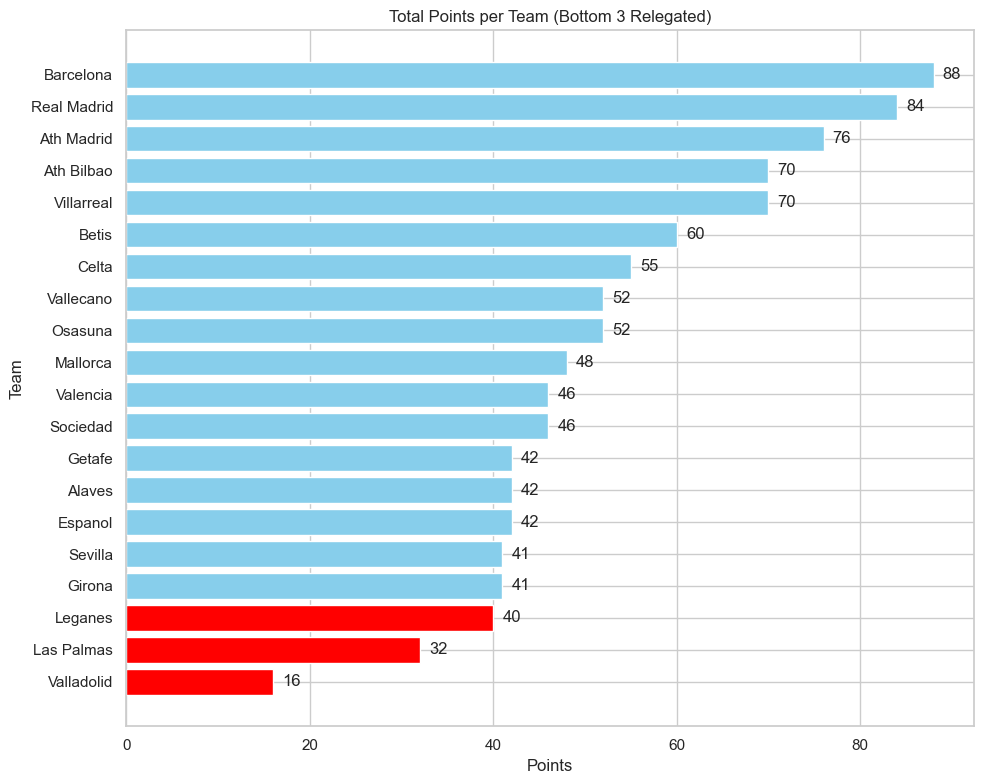

In [248]:
### Total Points per Team 
import matplotlib.pyplot as plt

# Ensure sorted by Points descending - adding this for better visualization
league_table_sorted = league_table.sort_values(by='Points', ascending=True).reset_index(drop=True)

# Choose colors: red for bottom 3, blue for rest
colors = ['red' if i < 3 else 'skyblue' for i in range(len(league_table_sorted))]

# Plot manually
plt.figure(figsize=(10, 8))
bars = plt.barh(league_table_sorted['Team'], league_table_sorted['Points'], color=colors)

# Add labels & title
plt.xlabel('Points')
plt.ylabel('Team')
plt.title('Total Points per Team (Bottom 3 Relegated)')
plt.tight_layout()

# Optional: add text labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width}', va='center')

plt.show()


/var/folders/mj/p87t7kg14vsbdwvq7j7xr9840000gn/T/ipykernel_14243/3233677516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_copy, x='FTR', palette='Blues')


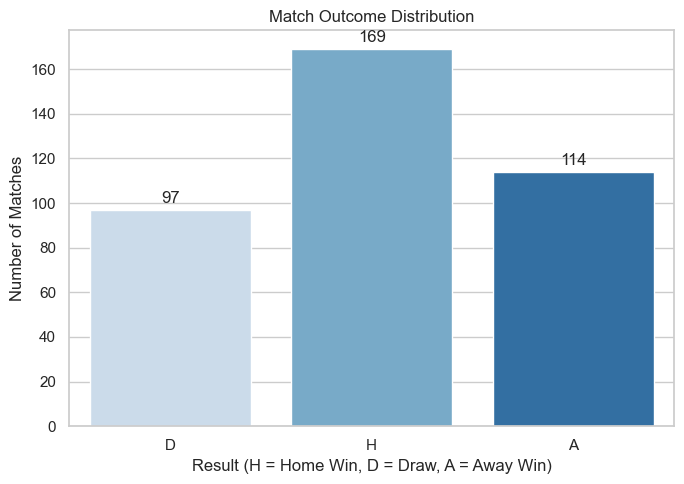

In [249]:
### Match Outcome Distribution
plt.figure(figsize=(7, 5))
sns.countplot(data=df_copy, x='FTR', palette='Blues')
plt.title('Match Outcome Distribution')
plt.xlabel('Result (H = Home Win, D = Draw, A = Away Win)')
plt.ylabel('Number of Matches')

# Add value labels
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2, p.get_height() + 3,
             int(p.get_height()), ha='center')

plt.tight_layout()
plt.show()


In [250]:
team_acronyms = {
    'Alavés': 'ALA',
    'Athletic Bilbao': 'ATH',
    'Atlético Madrid': 'ATM',
    'Barcelona': 'FCB',
    'Celta Vigo': 'CEL',
    'Espanyol': 'ESP',
    'Getafe': 'GET',
    'Girona': 'GIR',
    'Las Palmas': 'LPA',
    'Leganés': 'LEG',
    'Mallorca': 'MAL',
    'Osasuna': 'OSA',
    'Rayo Vallecano': 'RAY',
    'Real Betis': 'BET',
    'Real Madrid': 'RMA',
    'Real Sociedad': 'RSO',
    'Sevilla': 'SEV',
    'Valencia': 'VAL',
    'Villarreal': 'VIL',
    'Valladolid': 'VLL'
}


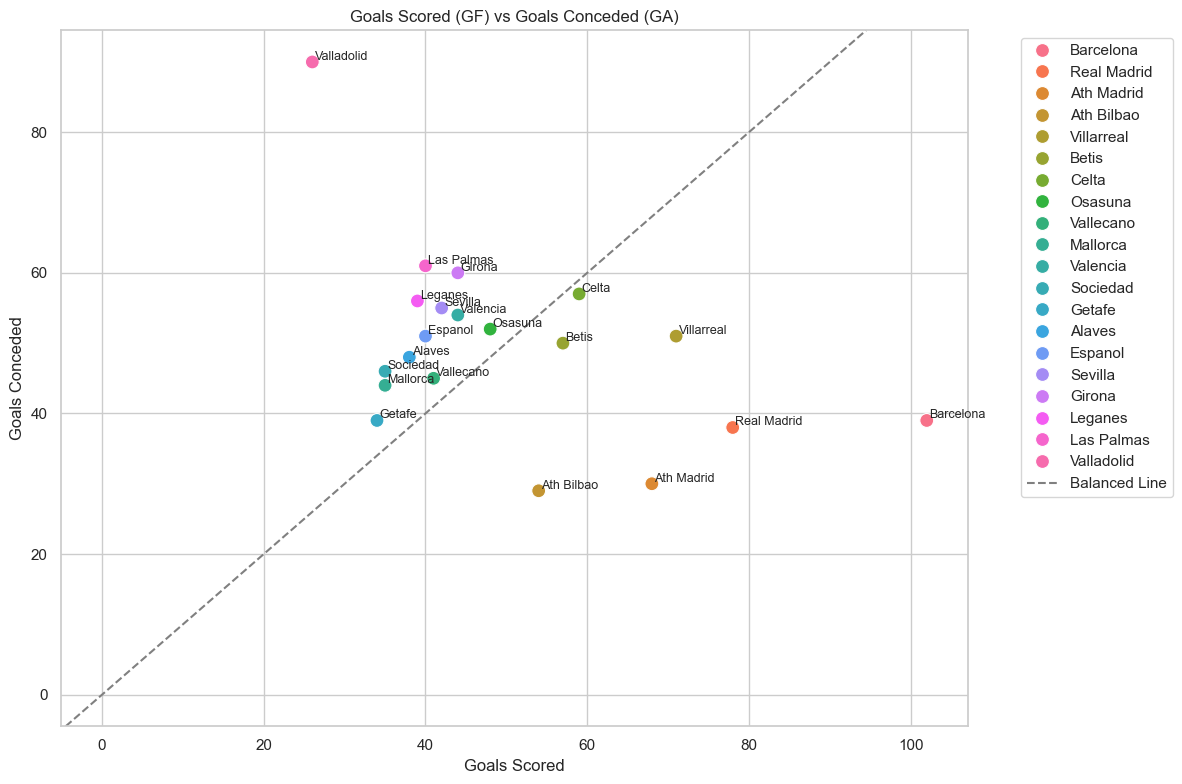

In [251]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=league_table, x='GoalsFor', y='GoalsAgainst', hue='Team', s=100)

for i in range(league_table.shape[0]):
    x = league_table.iloc[i]['GoalsFor']
    y = league_table.iloc[i]['GoalsAgainst']
    team = league_table.iloc[i]['Team']
    plt.text(x + 0.3, y + 0.3, team, fontsize=9)

plt.axline((0, 0), slope=1, linestyle='--', color='gray', label='Balanced Line')
plt.title('Goals Scored (GF) vs Goals Conceded (GA)')
plt.xlabel('Goals Scored')
plt.ylabel('Goals Conceded')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/var/folders/mj/p87t7kg14vsbdwvq7j7xr9840000gn/T/ipykernel_14243/2322335768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=league_table.sort_values(by='GoalDifference', ascending=False),


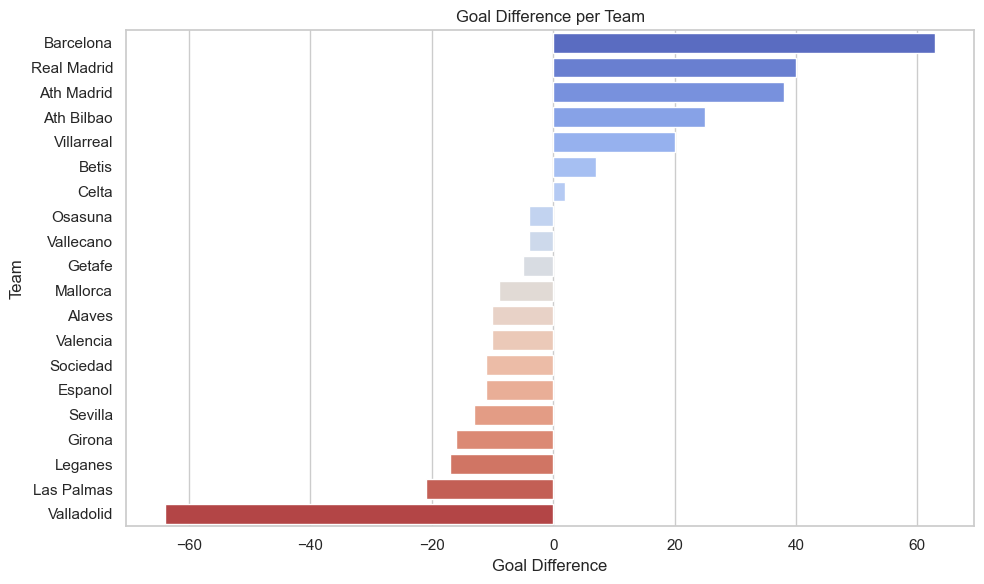

In [252]:
### Goal Difference per Team
plt.figure(figsize=(10, 6))
sns.barplot(data=league_table.sort_values(by='GoalDifference', ascending=False),
            x='GoalDifference', y='Team', palette='coolwarm')
plt.xlabel('Goal Difference')
plt.ylabel('Team')
plt.title('Goal Difference per Team')
plt.tight_layout()
plt.show()


In [253]:
### Home vs Away Goals - For Each Team
home_goals = df_copy.groupby('HomeTeam')['FTHG'].sum()
away_goals = df_copy.groupby('AwayTeam')['FTAG'].sum()

# Combine into a DataFrame
goals_df = pd.DataFrame({
    'Team': home_goals.index,
    'HomeGoals': home_goals.values,
    'AwayGoals': away_goals.values
}).set_index('Team')

### Sort by total Goals
goals_df['Total'] = goals_df['HomeGoals'] + goals_df['AwayGoals']
goals_df = goals_df.sort_values(by='Total', ascending=False)


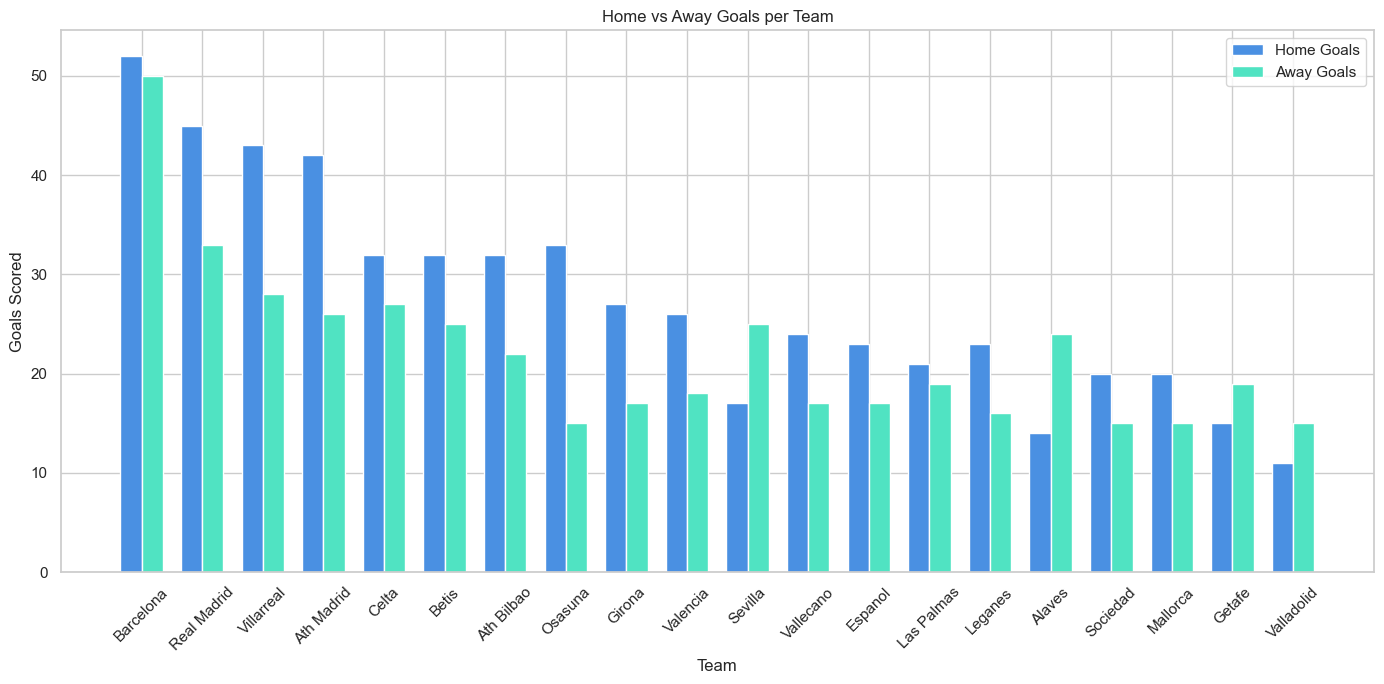

In [254]:
x = np.arange(len(goals_df))  # the label locations
width = 0.35  # width of bars

plt.figure(figsize=(14, 7))
plt.bar(x - width/2, goals_df['HomeGoals'], width, label='Home Goals', color='#4a90e2')
plt.bar(x + width/2, goals_df['AwayGoals'], width, label='Away Goals', color='#50e3c2')

# Labels and aesthetics
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.title('Home vs Away Goals per Team')
plt.xticks(x, goals_df.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/mj/p87t7kg14vsbdwvq7j7xr9840000gn/T/ipykernel_14243/3547443399.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_wins.values, y=home_wins.index, palette='viridis')


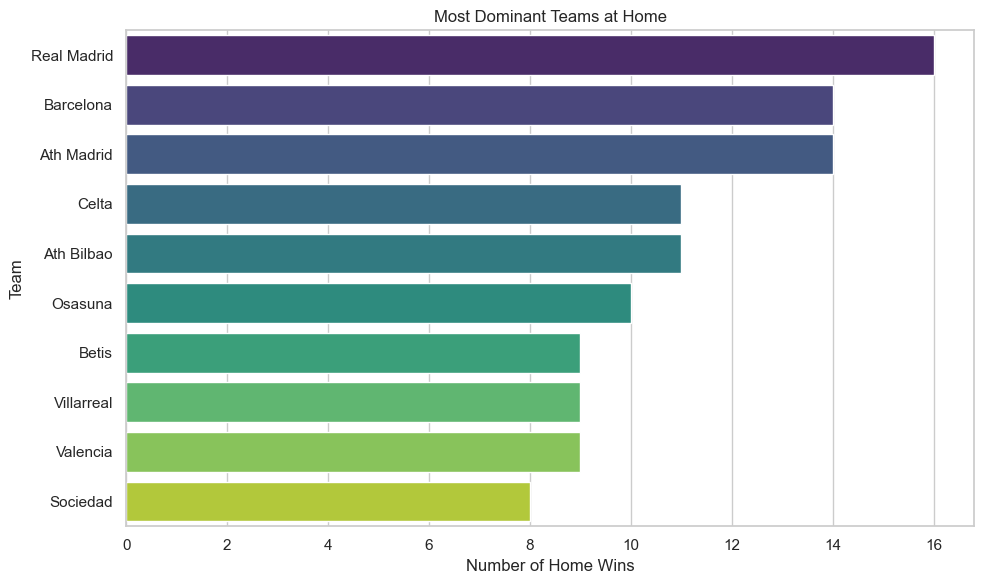

In [255]:
### Most dominant teams at home 
home_wins = df_copy[df_copy['FTR'] == 'H']['HomeTeam'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=home_wins.values, y=home_wins.index, palette='viridis')
plt.xlabel('Number of Home Wins')
plt.ylabel('Team')
plt.title('Most Dominant Teams at Home')
plt.tight_layout()
plt.show()

In [256]:
# First, create cumulative points per match for top teams
df_copy['HomePoints'], df_copy['AwayPoints'] = zip(*df_copy['FTR'].map({
    'H': (3, 0),
    'A': (0, 3),
    'D': (1, 1)
}).tolist())

home_points = df_copy.groupby(['Date', 'HomeTeam'])['HomePoints'].sum().unstack().fillna(0)
away_points = df_copy.groupby(['Date', 'AwayTeam'])['AwayPoints'].sum().unstack().fillna(0)
total_points = home_points.add(away_points, fill_value=0).sort_index().cumsum()

top_teams = league_table.sort_values('Points', ascending=False).head(5)['Team']

plt.figure(figsize=(12, 6))
total_points[top_teams].plot()
plt.title('Cumulative Points Over Season (Top 5 Teams)')
plt.xlabel('Match Date')
plt.ylabel('Cumulative Points')
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Date'

/var/folders/mj/p87t7kg14vsbdwvq7j7xr9840000gn/T/ipykernel_14243/1838364239.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['MatchDate'] = pd.to_datetime(df_copy['Date'])


<Figure size 1400x1000 with 0 Axes>

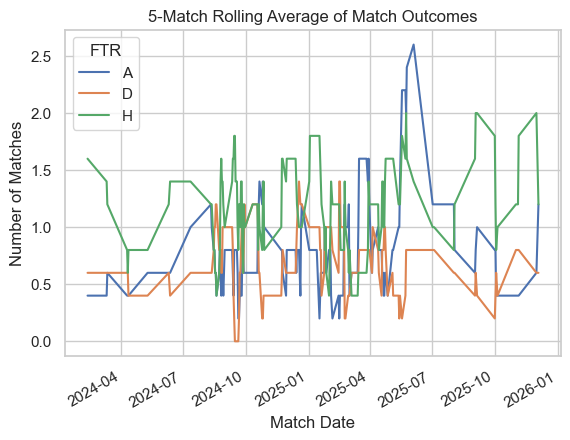

In [ ]:
df_copy['MatchDate'] = pd.to_datetime(df_copy['Date'])

match_trend = df_copy.groupby(['MatchDate', 'FTR']).size().unstack().fillna(0)

plt.figure(figsize=(14, 10))
match_trend.rolling(5).mean().plot()
plt.title('5-Match Rolling Average of Match Outcomes')
plt.xlabel('Match Date')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()


In [ ]:
### A very good analysis of the dataset would be to look at the trend of match outcomes over time

# Re-create df_copy from df to avoid NoneType errors
df_copy = df.copy()

# Ensure that the Date column is in datetime format
df_copy['MatchDate'] = pd.to_datetime(df_copy['Date'])

# Sorting the matches chronologically
df_copy = df_copy.sort_values(by='MatchDate')

### Add Home and Away Points to the DataFrame
def assign_points(ftr):
    if ftr == 'H':
        return 3, 0
    elif ftr == 'A':
        return 0, 3
    elif ftr == 'D':
        return 1, 1

df_copy['HomePoints'], df_copy['AwayPoints'] = zip(*df_copy['FTR'].map(assign_points))

/var/folders/mj/p87t7kg14vsbdwvq7j7xr9840000gn/T/ipykernel_14243/3483038391.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['MatchDate'] = pd.to_datetime(df_copy['Date'])


In [ ]:
home_df = df_copy[['Date', 'HomeTeam', 'HomePoints']].rename(columns={
    'HomeTeam': 'Team',
    'HomePoints': 'Points'
})

away_df = df_copy[['Date', 'AwayTeam', 'AwayPoints']].rename(columns={
    'AwayTeam': 'Team',
    'AwayPoints': 'Points'
})

long_df = pd.concat([home_df, away_df], ignore_index=True).sort_values('Date')


In [ ]:
# Match number per team (Gameweek index)
long_df['Matchday'] = long_df.groupby('Team').cumcount() + 1

# Cumulative points per team
long_df['CumulativePoints'] = long_df.groupby('Team')['Points'].cumsum()

top_5_teams = league_table.sort_values('Points', ascending=False).head(5)['Team'].tolist()


In [ ]:
# From earlier
# long_df = dataframe with one row per match per team (Home or Away), with cumulative points
rankings = long_df.pivot_table(index='Matchday', columns='Team', values='CumulativePoints')
rankings = rankings.fillna(method='ffill').fillna(0)
rank_positions = rankings.rank(axis=1, method='min', ascending=False)


/var/folders/mj/p87t7kg14vsbdwvq7j7xr9840000gn/T/ipykernel_14243/3337458260.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rankings = rankings.fillna(method='ffill').fillna(0)


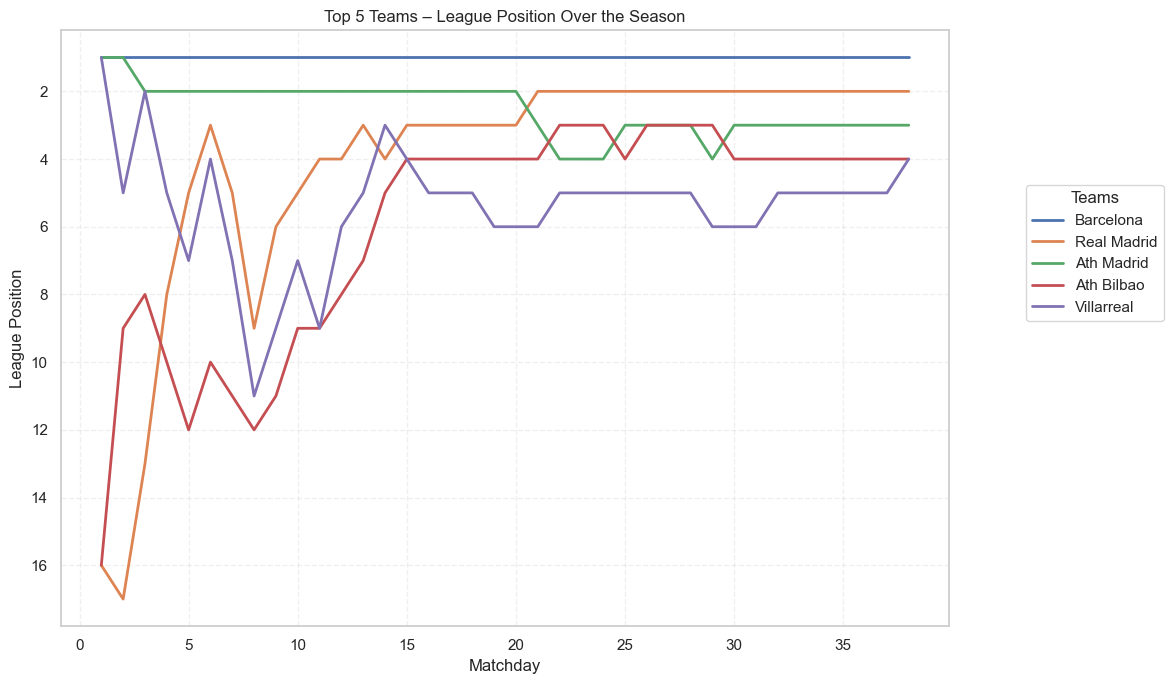

In [ ]:
plt.figure(figsize=(12, 7))

for team in top_5_teams:
    plt.plot(rank_positions.index, rank_positions[team], label=team, linewidth=2)

plt.gca().invert_yaxis()  # So 1 is at the top
plt.title('Top 5 Teams – League Position Over the Season')
plt.xlabel('Matchday')
plt.ylabel('League Position')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Teams', loc='lower right', bbox_to_anchor=(1.25, 0.5))
plt.tight_layout()
plt.show()


In [ ]:
### Matches Won Despite Red Cards
# Filter matches where red card count > 0
red_card_wins = df_copy[
    ((df_copy['FTR'] == 'H') & (df_copy['HR'] > 0)) |
    ((df_copy['FTR'] == 'A') & (df_copy['AR'] > 0))
]

# Count
print(f"Matches won despite red cards: {len(red_card_wins)}")


Matches won despite red cards: 19


In [ ]:
### Matches lost despite leading at half-time
lost_lead = df_copy[
    ((df_copy['HTR'] == 'H') & (df_copy['FTR'] == 'A')) |
    ((df_copy['HTR'] == 'A') & (df_copy['FTR'] == 'H'))
]

print(f"Matches lost after leading at halftime: {len(lost_lead)}")


Matches lost after leading at halftime: 23


In [ ]:
### Matches Won Despite Losing at Half-Time
comebacks = df_copy[
    ((df_copy['HTR'] == 'A') & (df_copy['FTR'] == 'H')) |
    ((df_copy['HTR'] == 'H') & (df_copy['FTR'] == 'A'))
]

print(f"Comeback wins after trailing at halftime: {len(comebacks)}")


Comeback wins after trailing at halftime: 23


In [ ]:
# Step 1: Sort by Date
df_copy = df_copy.sort_values('Date').reset_index(drop=True)

# Step 2: Initialize a dictionary to track cumulative points
team_points = {team: 0 for team in pd.unique(df_copy[['HomeTeam', 'AwayTeam']].values.ravel())}

# Step 3: Function to get pre-match points
def get_pre_match_points(home, away):
    return team_points[home], team_points[away]

# Step 4: Track upsets
upset_matches = []

for idx, row in df_copy.iterrows():
    home, away = row['HomeTeam'], row['AwayTeam']
    ftr = row['FTR']
    
    home_pts, away_pts = get_pre_match_points(home, away)
    
    # Check for upset: team with fewer pre-match points wins
    if ftr == 'H' and home_pts < away_pts:
        upset_matches.append(idx)
    elif ftr == 'A' and away_pts < home_pts:
        upset_matches.append(idx)
    
    # Update team_points after match
    if ftr == 'H':
        team_points[home] += 3
    elif ftr == 'A':
        team_points[away] += 3
    else:
        team_points[home] += 1
        team_points[away] += 1

# Step 5: Create Upset DataFrame
upsets_df = df_copy.loc[upset_matches].copy()
print(f" Total Upsets Detected: {len(upsets_df)}")


🔥 Total Upsets Detected: 94


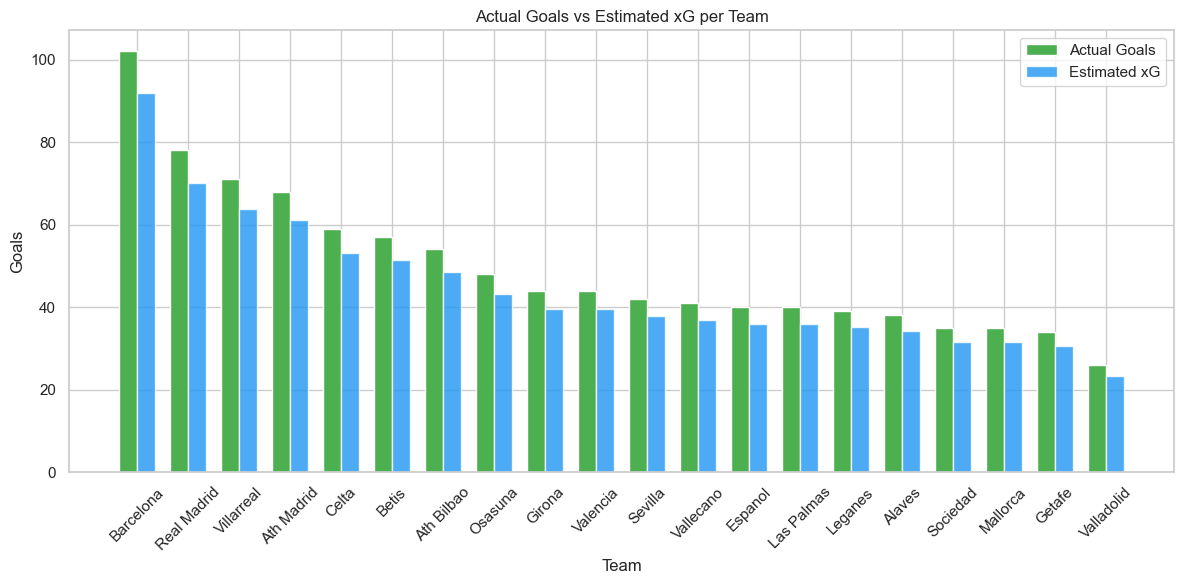

/var/folders/mj/p87t7kg14vsbdwvq7j7xr9840000gn/T/ipykernel_14243/3480961578.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_xg_df, x='Team', y='xG_Diff', palette='coolwarm')


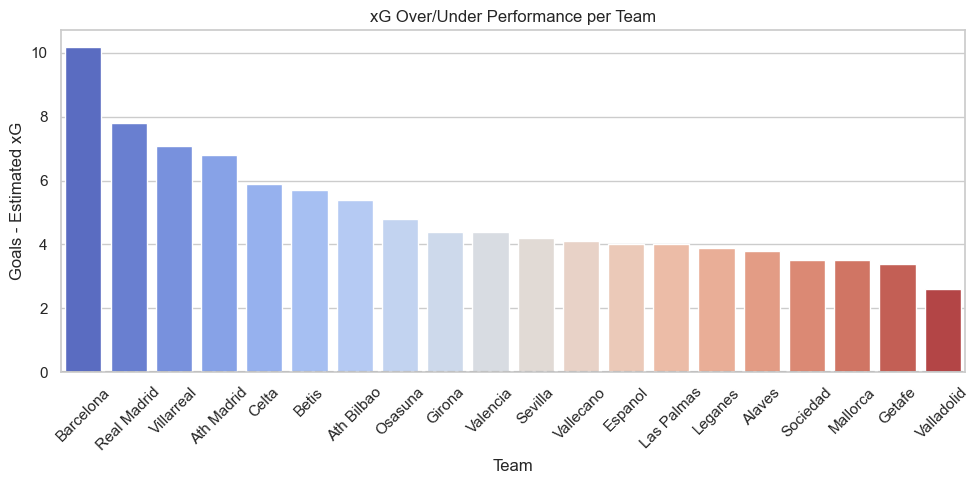

In [ ]:

# 1. Estimate Proxy xG
# We'll assume each goal is ~0.1 xG as a simplification (non-penalty open play avg)
# We'll scale it using goals scored per match and normalize later

# First, count number of matches per team (Home + Away)
home_matches = df_copy['HomeTeam'].value_counts()
away_matches = df_copy['AwayTeam'].value_counts()
total_matches = home_matches.add(away_matches, fill_value=0)

# Sum goals by team
home_goals = df_copy.groupby('HomeTeam')['FTHG'].sum()
away_goals = df_copy.groupby('AwayTeam')['FTAG'].sum()
total_goals = home_goals.add(away_goals, fill_value=0)

# Compute Goals per Match
goals_per_match = total_goals / total_matches

# Use a proxy multiplier (tuned to make proxy xG realistic) 
proxy_xg = goals_per_match * total_matches * 0.9  # Assume each team underperforms slightly

# Assemble DataFrame
team_xg_df = pd.DataFrame({
    'Team': total_goals.index,
    'Matches': total_matches,
    'Goals': total_goals,
    'Proxy_xG': proxy_xg
})

# Calculate Difference
team_xg_df['xG_Diff'] = team_xg_df['Goals'] - team_xg_df['Proxy_xG']

# Sort by difference
team_xg_df = team_xg_df.sort_values('xG_Diff', ascending=False).reset_index(drop=True)

# 2. Plot Actual Goals vs Proxy xG
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(team_xg_df))

plt.bar(index, team_xg_df['Goals'], bar_width, label='Actual Goals', color='#4CAF50')
plt.bar([i + bar_width for i in index], team_xg_df['Proxy_xG'], bar_width, label='Estimated xG', color='#2196F3', alpha=0.8)

plt.xlabel('Team')
plt.ylabel('Goals')
plt.title('Actual Goals vs Estimated xG per Team')
plt.xticks([i + bar_width / 2 for i in index], team_xg_df['Team'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Plot xG Over/Under Performance
plt.figure(figsize=(10, 5))
sns.barplot(data=team_xg_df, x='Team', y='xG_Diff', palette='coolwarm')
plt.axhline(0, linestyle='--', color='gray')
plt.title('xG Over/Under Performance per Team')
plt.ylabel('Goals - Estimated xG')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
